In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import requests

In [2]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
import copy
from credit_data_actual_values import substitute
import h2o
from h2o.automl import H2OAutoML
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.model_selection import GridSearchCV

In [4]:
response=requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data')

In [5]:
with open('data/creditdata.csv','wb') as f:
    f.write(response.content)

In [6]:
data=pd.read_csv('data/creditdata.csv',header=None,sep='\s+')

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
df=copy.deepcopy(data)
df=substitute(df)

In [9]:
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,<100 DM,4<= <7 years,3,female:divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good Risk
996,<0 DM,30,existing credits paid back duly till now,car (used),3857,<100 DM,1<= < 4 years,4,male:divorced/separated,none,...,savings agreement/life insurance,40,none,own,1,management/ highly qualified employee,1,yes,yes,Good Risk
997,no checking account,12,existing credits paid back duly till now,radio/television,804,<100 DM,>=7 years,4,male:single,none,...,car or other,38,none,own,1,skilled employee / official,1,none,yes,Good Risk
998,<0 DM,45,existing credits paid back duly till now,radio/television,1845,<100 DM,1<= < 4 years,4,male:single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,yes,yes,Bad Risk


In [10]:
df.columns=[col.replace(' ','_') for col in df.columns]
df.columns=[col.replace('/','') for col in df.columns]

In [11]:
df.columns

Index(['Status_of_existing_checking_account', 'Duration_in_month',
       'Credit_history', 'Purpose', 'Credit_amount', 'Savings_accountbonds',
       'Present_employment_since',
       'Installment_rate_in_percentage_of_disposable_income',
       'Personal_status_and_sex', 'Other_debtors__guarantors',
       'Present_residence_since', 'Property', 'Age_in_years',
       'Other_installment_plans', 'Housing',
       'Number_of_existing_credits_at_this_bank', 'Job',
       'Number_of_people_being_liable_to_provide_maintenance_for', 'Telephone',
       'foreign_worker', 'Cost_Matrix(Risk)'],
      dtype='object')

In [12]:
df.to_csv('data/creditdata_update.csv',index=False)

<AxesSubplot:>

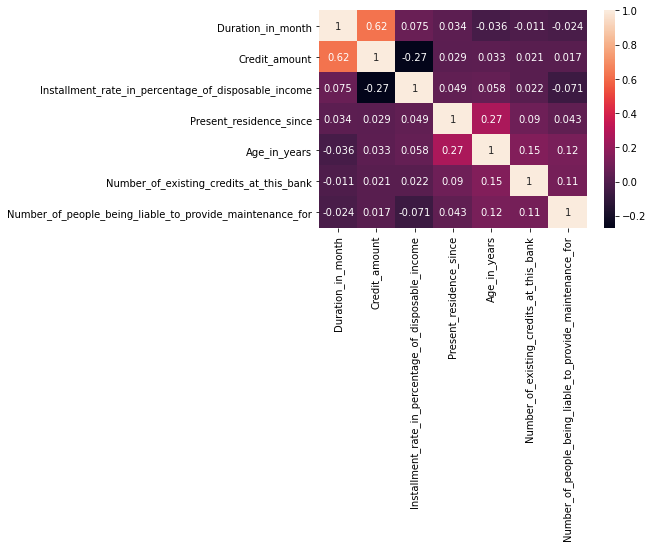

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df.describe()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_people_being_liable_to_provide_maintenance_for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


<AxesSubplot:>

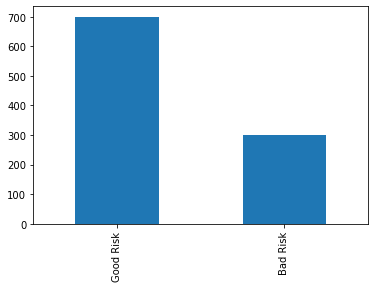

In [15]:
df['Cost_Matrix(Risk)'].value_counts().plot(kind='bar')

<AxesSubplot:>

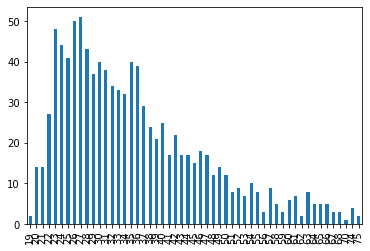

In [16]:
df['Age_in_years'].value_counts().sort_index().plot(kind='bar')

In [17]:
df.groupby('Age_in_years')['Cost_Matrix(Risk)'].value_counts().sort_index()

Age_in_years  Cost_Matrix(Risk)
19            Bad Risk             1
              Good Risk            1
20            Bad Risk             5
              Good Risk            9
21            Bad Risk             5
                                  ..
68            Good Risk            1
70            Good Risk            1
74            Bad Risk             1
              Good Risk            3
75            Good Risk            2
Name: Cost_Matrix(Risk), Length: 100, dtype: int64

Text(0.5, 0, 'Duration in months, cost Matrix')

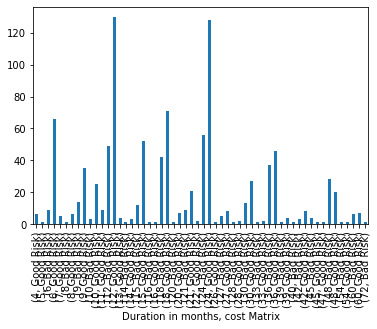

In [18]:
df.groupby('Duration_in_month')['Cost_Matrix(Risk)'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Duration in months, cost Matrix')

<AxesSubplot:xlabel='Status_of_existing_checking_account,Cost_Matrix(Risk)'>

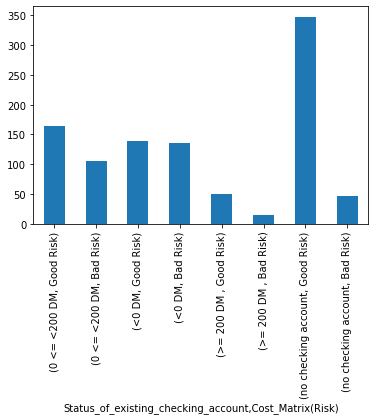

In [19]:
df.groupby('Status_of_existing_checking_account')['Cost_Matrix(Risk)'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Age_in_years', ylabel='Cost_Matrix(Risk)'>

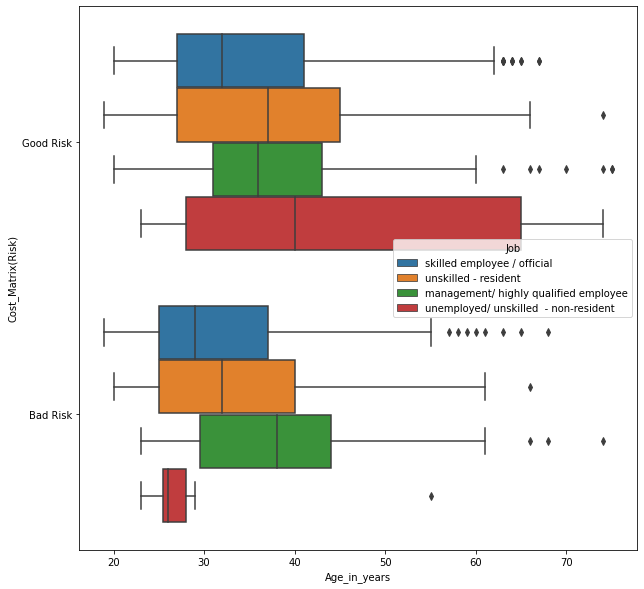

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Age_in_years'],y=df['Cost_Matrix(Risk)'],hue=df['Job'])

<AxesSubplot:xlabel='Present_residence_since', ylabel='Cost_Matrix(Risk)'>

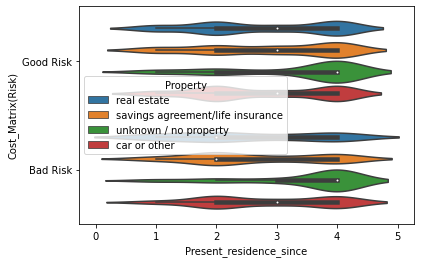

In [21]:
sns.violinplot(x=df['Present_residence_since'],y=df['Cost_Matrix(Risk)'],hue=df['Property'])

<AxesSubplot:xlabel='Present_residence_since', ylabel='Cost_Matrix(Risk)'>

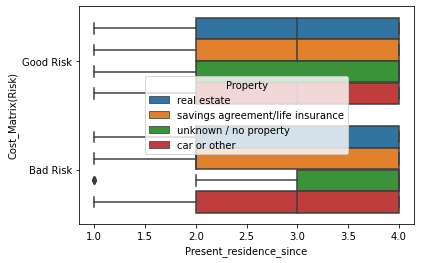

In [22]:
sns.boxplot(x=df['Present_residence_since'],y=df['Cost_Matrix(Risk)'],hue=df['Property'])

In [23]:
x_features=[col for col in df.columns if not col in ['Cost_Matrix(Risk)']]
y_features='Cost_Matrix(Risk)'

In [24]:
X=df[x_features]
Y=df[y_features]

In [25]:
categorical_features=X.select_dtypes(include=['object']).columns
ct=ColumnTransformer([('onehotEncoder',OneHotEncoder(),categorical_features)],remainder='passthrough')
X=ct.fit_transform(X)

In [101]:
XX=df[x_features]

In [115]:
XX.loc[0].values

array(['<0 DM', 6, 'critical account', 'radio/television', 1169,
       'no savings account', '>=7 years', 4, 'male:single', 'none', 4,
       'real estate', 67, 'none', 'own', 2, 'skilled employee / official',
       1, 'yes', 'yes'], dtype=object)

In [109]:
ct.transform(XX)

array([[ 0.,  1.,  0., ..., 67.,  2.,  1.],
       [ 1.,  0.,  0., ..., 22.,  1.,  1.],
       [ 0.,  0.,  0., ..., 49.,  1.,  2.],
       ...,
       [ 0.,  0.,  0., ..., 38.,  1.,  1.],
       [ 0.,  1.,  0., ..., 23.,  1.,  1.],
       [ 1.,  0.,  0., ..., 27.,  1.,  1.]])

In [37]:
import pickle

In [38]:
pickle.dump(ct,open('columntransformer.pkl','wb'))

In [26]:
labelencoder=LabelEncoder()
labelencoder.fit(Y)
print(labelencoder.classes_)
Y=labelencoder.transform(Y).reshape(-1,1)

['Bad Risk' 'Good Risk']


In [27]:
labelencoder.classes_

array(['Bad Risk', 'Good Risk'], dtype=object)

In [28]:
Y[:10]

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [29]:
print(X.shape,Y.shape)

(1000, 61) (1000, 1)


In [30]:
print(df.shape)

(1000, 21)


In [31]:
Y.shape

(1000, 1)

In [32]:
type(Y),type(X)

(numpy.ndarray, numpy.ndarray)

In [33]:
preprocessed=np.concatenate((X,Y),axis=1)

In [34]:
cleaned=pd.DataFrame(preprocessed)

In [35]:
cleaned.to_csv('data/cleanedcreditdata.csv',index=False)

In [45]:
pd.DataFrame(range(len(x_features)),index=x_features).to_csv('data/columns.csv',header=False)

In [47]:
pd.DataFrame(x_features).to_json('data/columns.json')

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin

In [141]:
class FeatureTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,X,y=None,columns=None):
        self.features= columns
        return self
    def fit(self,X,y=None):
        self.X=X
        self.transformer=ColumnTransformer(['onehotencoder',OneHotEncoder(),self.features])
        self.transformer.fit(X)
    def trasnform(self,X,y=None):
        self.X=self.transformer.transform(self.X)
        return self.X

In [51]:
import json

In [72]:
with open('data/columns.json') as f:
    a=list(json.load(f)['0'].values())

In [87]:
a

['Status_of_existing_checking_account',
 'Duration_in_month',
 'Credit_history',
 'Purpose',
 'Credit_amount',
 'Savings_accountbonds',
 'Present_employment_since',
 'Installment_rate_in_percentage_of_disposable_income',
 'Personal_status_and_sex',
 'Other_debtors__guarantors',
 'Present_residence_since',
 'Property',
 'Age_in_years',
 'Other_installment_plans',
 'Housing',
 'Number_of_existing_credits_at_this_bank',
 'Job',
 'Number_of_people_being_liable_to_provide_maintenance_for',
 'Telephone',
 'foreign_worker']

In [45]:
d={
  "Status_of_existing_checking_account": "<0 DM",
  "Duration_in_month": 6,
  "Credit_history": "critical account",
  "Purpose": "radio/television",
  "Credit_amount": 1169,
  "Savings_accountbonds": "no savings account",
  "Present_employment_since": ">=7 years",
  "Installment_rate_in_percentage_of_disposable_income": 4,
  "Personal_status_and_sex": "male:single",
  "Other_debtors__guarantors": "none",
  "Present_residence_since": 4,
  "Property": "real estate",
  "Age_in_years": 67,
  "Other_installment_plans": "none",
  "Housing": "own",
  "Number_of_existing_credits_at_this_bank": 2,
  "Job": "skilled employee / official",
  "Number_of_people_being_liable_to_provide_maintenance_for": 1,
  "Telephone": "yes",
  "foreign_worker": "yes",
  "credit_risk_rating":"Good Risk"
}